In [1]:
import pandas as pd

train_file_path = '/Users/imdaegyeong/Desktop/archive/Train.csv'
test_file_path = '/Users/imdaegyeong/Desktop/archive/Test.csv'

train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)


In [2]:
# 피어슨 상관계수를 기반으로 상관관계가 높은 20개의 특성을 선택하는 과정을 진행합니다.
# 우선 목표 변수인 'Class'와 각 특성 간의 상관계수를 계산하고, 상관계수가 높은 20개의 특성을 추출합니다.

# 목표 변수 설정
target_column = 'Class'

# 상관계수 계산
correlation_with_target = train_data.corr()[target_column].abs().sort_values(ascending=False)

# 상관계수가 높은 상위 20개의 특성 선택 (target_column 제외)
top_20_features = correlation_with_target.drop(target_column).head(20).index.tolist()

top_20_features


['feature_1400',
 'feature_1244',
 'feature_1154',
 'feature_1048',
 'feature_1144',
 'feature_1345',
 'feature_1423',
 'feature_1425',
 'feature_1199',
 'feature_1155',
 'feature_1219',
 'feature_969',
 'feature_352',
 'feature_1109',
 'feature_1119',
 'feature_1395',
 'feature_2',
 'feature_1456',
 'feature_1090',
 'feature_1374']

In [3]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 사용할 특성 목록
features = top_20_features

# 입력 데이터와 목표 변수 분리
X = train_data[features]
y = train_data[target_column]

# 학습 데이터와 검증 데이터로 나누기
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 학습
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# 검증 데이터 예측
y_pred = model.predict(X_val)

# 성능 평가
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.8980
Precision: 0.3077
Recall: 0.3077
F1 Score: 0.3077


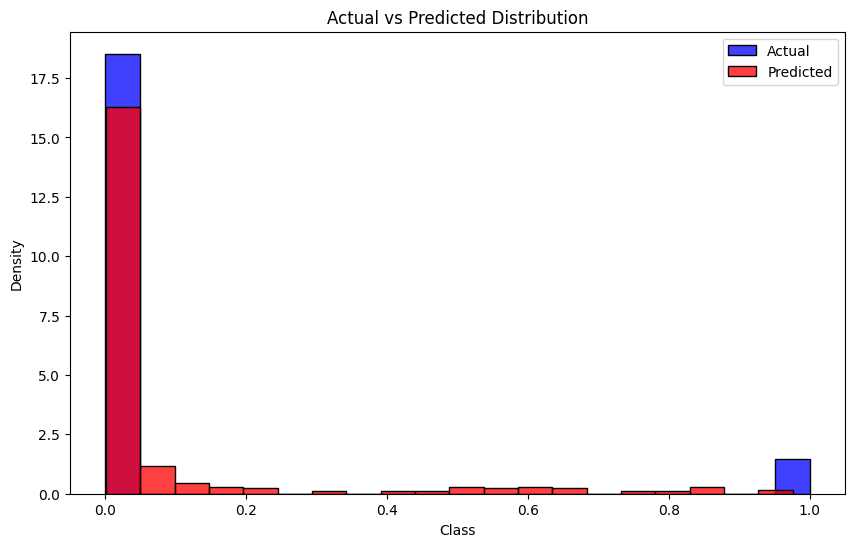

In [5]:
# 검증 데이터 결과를 시각화하기 위한 그래프를 그립니다.
# 실제 값과 예측 값의 분포를 비교하는 그래프를 그려보겠습니다.

import matplotlib.pyplot as plt
import seaborn as sns

# 모델을 다시 학습한 후 예측 확률을 사용해 그래프를 그리겠습니다.

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 데이터를 다시 불러와 특성 선택 후 나누기
X = train_data[top_20_features]
y = train_data['Class']

# Train-Test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# 예측 확률 값 추출
y_pred_proba = model.predict_proba(X_val)[:, 1]

# 시각화: 실제 값과 예측 확률 분포 비교
plt.figure(figsize=(10, 6))
sns.histplot(y_val, label='Actual', color='blue', kde=False, stat='density', bins=20)
sns.histplot(y_pred_proba, label='Predicted', color='red', kde=False, stat='density', bins=20)
plt.title('Actual vs Predicted Distribution')
plt.xlabel('Class')
plt.ylabel('Density')
plt.legend()
plt.show()
